# The Fisher Distribution

## Import scientific python packages

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import IPython
import pandas as pd
import numpy as np
%matplotlib inline

## Import data

Let's look at some data from a study we published on *ca.* 1.1 billion-year-old volcanic rocks that is available in the MagIC database (https://earthref.org/MagIC/16333).

In [2]:
MP_sites = pd.read_csv('data/Swanson-Hysell2014a/sites.txt',sep='\t',header=1)

In [3]:
MP_sites_lowerR1 = MP_sites[MP_sites.height<600]
MPlowerR1_mean = ipmag.fisher_mean(dec=MP_sites_lowerR1.vgp_lon.tolist(),
                                   inc=MP_sites_lowerR1.vgp_lat.tolist())
MP_sites_lowerR2 = MP_sites[(MP_sites.height > 1070) & (MP_sites.height < 1350)]
MPlowerR2_mean = ipmag.fisher_mean(dec=MP_sites_lowerR2.vgp_lon.tolist(),
                                   inc=MP_sites_lowerR2.vgp_lat.tolist())
MP_sites_lowerN = MP_sites[(MP_sites.height > 1350) & (MP_sites.height < 1810)]
MP_sites_upperR = MP_sites[(MP_sites.height > 1860) & (MP_sites.height < 2100)]
MPlower_N_upper_R_mean = ipmag.fisher_mean(dec=MP_sites_lowerN.vgp_lon.tolist()+MP_sites_upperR.vgp_lon.tolist(),
                                           inc=MP_sites_lowerN.vgp_lat.tolist()+MP_sites_upperR.vgp_lat.tolist())
MP_sites_upperN = MP_sites[MP_sites.height > 2400]
MPupperN_mean = ipmag.fisher_mean(dec=MP_sites_upperN.vgp_lon.tolist(),
                                   inc=MP_sites_upperN.vgp_lat.tolist())

pole_means = pd.DataFrame(columns=['PoleName','SLat','SLon','PLat','PLon',
                                   'A95','K','N','PolarityZone','PmagRef',
                                   'AgeNominal','AgeLower','AgeUpper',
                                   'AgeInfo','AgeRef','Gaussian_2sigma',
                                   'GaussianOrUniform','Q','color'])

pole_means.loc['MP_lowerR1'] = pd.Series({'PoleName' : 'Mamainse lower reversed 1',
                                        'SLat' : round(MP_sites_lowerR1.lat[0],2),
                                        'SLon' : round(MP_sites_lowerR1.lon[0],2),
                                        'PLat' : round(MPlowerR1_mean['inc'],1),
                                        'PLon' : round(MPlowerR1_mean['dec'],1),
                                        'A95' : round(MPlowerR1_mean['alpha95'],1),
                                        'K' : round(MPlowerR1_mean['k'],1),
                                        'N' : int(MPlowerR1_mean['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell et al., 2014a',
                                        'AgeNominal' : 1109,
                                        'AgeLower' : 1106,
                                        'AgeUpper' : 1112,
                                        'AgeInfo' : 'Likely older than ca. 1105 Ma given distinct higher latitude pole position from Osler R1 and similar position to ca. 1107 Ma Siemens Creek Volcanic Pole',
                                        'AgeRef' : '',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '7',
                                        'color' : '#930E26'})

pole_means.loc['MP_lowerR2'] = pd.Series({'PoleName' : 'Mamainse lower reversed 2',
                                        'SLat' : round(MP_sites_lowerR2.lat.tolist()[0],2),
                                        'SLon' : round(MP_sites_lowerR2.lon.tolist()[0],2),
                                        'PLat' : round(MPlowerR2_mean['inc'],1),
                                        'PLon' : round(MPlowerR2_mean['dec'],1),
                                        'A95' : round(MPlowerR2_mean['alpha95'],1),
                                        'K' : round(MPlowerR2_mean['k'],1),
                                        'N' : int(MPlowerR2_mean['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell, 2014a',
                                        'AgeNominal' : 1105,
                                        'AgeLower' : 1100.4,
                                        'AgeUpper' : 1109,
                                        'AgeInfo' : 'Older than $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of 1100.4 Ma based on stratigraphic position; likely ca. 1105 Ma based on comparison with paleomagnetic data from the Osler Volcanic Group',
                                        'AgeRef' : 'Swanson-Hysell, 2014a',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '7',
                                        'color' : '#F8C1A6'})

pole_means.loc['MP_lowerNupperR'] = pd.Series({'PoleName' : 'Mamainse lower normal and upper reversed',
                                        'SLat' : round(MP_sites_upperR.lat.tolist()[0],2),
                                        'SLon' : round(MP_sites_upperR.lon.tolist()[0],2),
                                        'PLat' : round(MPlower_N_upper_R_mean['inc'],1),
                                        'PLon' : round(MPlower_N_upper_R_mean['dec'],1),
                                        'A95' : round(MPlower_N_upper_R_mean['alpha95'],1),
                                        'K' : round(MPlower_N_upper_R_mean['k'],1),
                                        'N' : int(MPlower_N_upper_R_mean['n']),
                                        'PolarityZone' : 'Flour Bay normal and reversed polarity zones',
                                        'PmagRef' : 'Swanson-Hysell, 2014a',
                                        'AgeNominal' : 1100.36,
                                        'AgeLower' : 1100.10,
                                        'AgeUpper' : 1100.61,
                                        'AgeInfo' : 'Age constrained by $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of 1100.36 $\pm$ 0.25 Ma on Flour Bay tuff',
                                        'AgeRef' : 'Swanson-Hysell, 2014a',
                                        'GaussianOrUniform' : 'gaussian',
                                        'Gaussian_2sigma' : 0.25,
                                        'Q' : '7',
                                        'color' : '#6A579A'})

pole_means.loc['MP_upperN'] = pd.Series({'PoleName' : 'Mamainse upper normal',
                                        'SLat' : round(MP_sites_upperN.lat.tolist()[0],2),
                                        'SLon' : round(MP_sites_upperN.lon.tolist()[0],2),
                                        'PLat' : round(MPupperN_mean['inc'],1),
                                        'PLon' : round(MPupperN_mean['dec'],1),
                                        'A95' : round(MPupperN_mean['alpha95'],1),
                                        'K' : round(MPupperN_mean['k'],1),
                                        'N' : int(MPupperN_mean['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell, 2014a',
                                        'AgeNominal' : 1094,
                                        'AgeLower' : 1090,
                                        'AgeUpper' : 1100,
                                        'AgeInfo' : 'Likely ca. 1094 Ma based on similar pole position to the Portage Lake Polarity Zone upper NE limb North Shore Volcanic Group poles',
                                        'AgeRef' : '',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '7',
                                        'color' : '#3B7185'})

def plot_MP_vgps():
    m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

    ipmag.plot_vgp(m,MP_sites_lowerR1['vgp_lon'].tolist(),
                   MP_sites_lowerR1['vgp_lat'].tolist(),
                   color=pole_means['color']['MP_lowerR1'],
                   label='Mamainse lower R1 (S-H et al., 2014a)')

    ipmag.plot_vgp(m,MP_sites_upperN['vgp_lon'].tolist(),
                   MP_sites_upperN['vgp_lat'].tolist(),
                   color=pole_means['color']['MP_upperN'],
                   label='Mamainse upper N (S-H et al., 2014a)')
    plt.legend(loc=8)
    
def plot_MP_vgps_poles():
    m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

    ipmag.plot_vgp(m,MP_sites_lowerR1['vgp_lon'].tolist(),
                   MP_sites_lowerR1['vgp_lat'].tolist(),
                   color=pole_means['color']['MP_lowerR1'],
                   label='Mamainse lower R1 (S-H et al., 2014a)')
    ipmag.plot_pole(m,pole_means['PLon']['MP_lowerR1'],
                    pole_means['PLat']['MP_lowerR1'],
                    pole_means['A95']['MP_lowerR1'],
                    marker='s',color=pole_means['color']['MP_lowerR1'],
                    edgecolor='k',markersize=30, label='lower R1 mean')

    ipmag.plot_vgp(m,MP_sites_upperN['vgp_lon'].tolist(),
                   MP_sites_upperN['vgp_lat'].tolist(),
                   color=pole_means['color']['MP_upperN'],
                   label='Mamainse upper N (S-H et al., 2014a)')
    ipmag.plot_pole(m,pole_means['PLon']['MP_upperN'],
                    pole_means['PLat']['MP_upperN'],
                    pole_means['A95']['MP_upperN'],
                    marker='s',color=pole_means['color']['MP_upperN'],
                    edgecolor='k',markersize=30, label='upper N mean')

    plt.legend(loc=8)

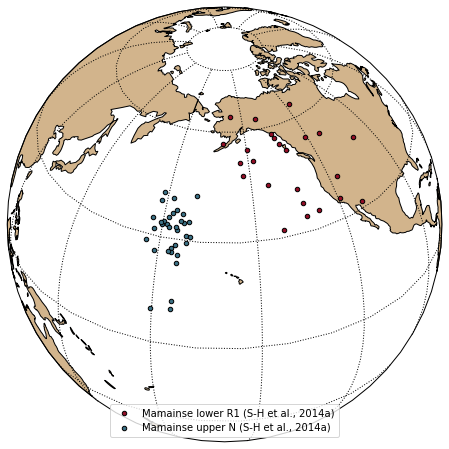

In [4]:
plot_MP_vgps()
plt.show()

## Description of the data and what we want as a summary

We have two sets of measured vectors (lower R1 and upper N). The principle source of scatter is interpreted to be due to variation of Earth's magnetic field that typically averages out to be Earth's spin axis. We want to calculate:
- a mean direction
- a statistic indicating the amount of scatter of the directions
- a confidence limit for the calculated mean direction (analogous to the estimated standard error of the mean)

For the data we are interested in, calculating the mean direction is straightforward through vector addition:
<img src="images/vecsum.png">

These means and their uncertainities are being determined using what us "paleomagnetists" refer to as Fisher statistics *but, we should probably be more specific given that the term Fisher distribution can mean a number of different things:*

In [5]:
url = 'https://en.wikipedia.org/wiki/Fisher_distribution'
iframe = '<iframe src=' + url + ' width=700 height=700></iframe>'
IPython.display.HTML(iframe)

## Our Fisher distribution is the Von Mises-Fisher distribution on a sphere

Here are the means with a 95% confidence ellipse determined using the Von Mises-Fisher distribution on these data:

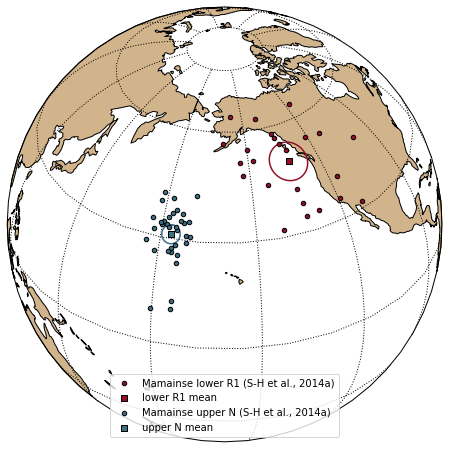

In [6]:
plot_MP_vgps_poles()
plt.show()

### Other applications of the Von Mises-Fisher distribution

Directional distributions are widely used in machine learning approaches including on clustering of text and gene expression data. See summary in **Directional Statistics in Machine Learning: a Brief Review** *Sra, 2016*. Here is an illustration from a 2018 ACM paper **Weakly-Supervised Neural Text Classification** showing directional classification in action: 

![Image of Yaktocat](images/text_classification.png)

*"it has been convincingly demonstrated that cosine
similarity is a more effective measure of similarity for analyzing and clustering text documents than just Euclidean distances."*

### Applying the Fisher distribution for pole uncertainty

For our purposes, we use the succinct 95% confidence ellipse resulting from the Von Mises-Fisher distribution to quantify paleogeographic uncertainty. Here is a summary of such mean pole positions being used to reconstruct rapid motion of ancient North America towards the equator:

![Image of Yaktocat](images/Fairchild2017.png)

## Uniform distribution on a sphere

The simplest probability distribution on a sphere is the spherical uniform distribution.
It has a probability density given by
\begin{equation}
  \rho_U(\phi, \psi) = \frac{1}{4 \pi},
\end{equation}
where $\rho_U$ is the probability density, $\phi$ is the longitude, and $\psi$ is the latitude.
Most non-uniform distributions on a sphere reduce to the uniform distribution in some limit.

<img src="images/distribution_uniform.png" style="width:300px">

## Von Mises–Fisher distribution on a sphere

The Fisher distribution (also called the von Mises-Fisher distribution) is the analogue
of a 2D normal distribution on a sphere.
The probability density $\rho_F$ at a point $\hat{\mathbf{x}}$ (or a given longitude [$\phi$] and latitude [$\psi$]) is given by

\begin{equation}
  \begin{aligned}
  \rho_F(\phi, \psi ; \kappa_F, \hat{\mathbf{\mu}}) 
  &= \frac{\kappa}{4 \pi \sinh{\kappa}} \exp \left( \kappa \hat{\mathbf{\mu}}^T \hat{\mathbf{x}} \right)
  \end{aligned}
\end{equation}



where $\hat{\mathbf{\mu}}$ is the unit vector for the mean direction of the distribution and $\kappa$ is the concentration of the distribution. 

When $\kappa$ is 0 the distribution is equivalent to a uniform distribution. The higher the value of the concentration parameter the tighter the distribution of directions about the mean direction. 


The distribution can be alternatively be parameterized using $\theta$, which is the angle between $\hat{\mathbf{x}}$ and $\hat{\mathbf{\mu}}$.

\begin{equation}
  \begin{aligned}
  \rho_F(\phi, \psi ; \kappa_F, \hat{\mathbf{\mu}}) 
  &= \frac{\kappa}{4 \pi \sinh{\kappa}} \exp \left( \kappa \cos \theta \right),
  \end{aligned}
\end{equation}

### Generating vectors from a Fisher distribution with very low $\kappa$ (uniform distribution)

In [7]:
ipmag.fishrot??

Signature: ipmag.fishrot(k=20, n=100, dec=0, inc=90, di_block=True)
Source:   
def fishrot(k=20, n=100, dec=0, inc=90, di_block=True):
    """
    Generates Fisher distributed unit vectors from a specified distribution
    using the pmag.py fshdev and dodirot functions.

    Parameters
    ----------
    k : kappa precision parameter (default is 20)
    n : number of vectors to determine (default is 100)
    dec : mean declination of distribution (default is 0)
    inc : mean inclination of distribution (default is 90)
    di_block : this function returns a nested list of [dec,inc,1.0] as the default
    if di_block = False it will return a list of dec and a list of inc

    Returns
    ---------
    di_block : a nested list of [dec,inc,1.0] (default)
    dec, inc : a list of dec and a list of inc (if di_block = False)

    Examples
    --------
    >>> ipmag.fishrot(k=20, n=5, dec=40, inc=60)
    [[44.766285502555775, 37.440866867657235, 1.0],
     [33.866315796883725, 64.732532250463

In [8]:
pmag.fshdev??

Signature: pmag.fshdev(k)
Source:   
def fshdev(k):
    """
    Generate a random draw from a Fisher distribution with mean declination
    of 0 and inclination of 90 with a specified kappa.

    Parameters
    ----------
    k : kappa (precision parameter) of the distribution
        k can be a single number or an array of values

    Returns
    ----------
    dec, inc : declination and inclination of random Fisher distribution draw
               if k is an array, dec, inc are returned as arrays, otherwise, single values
    """
    k = np.array(k)
    if len(k.shape) != 0:
        n = k.shape[0]
    else:
        n = 1
    R1 = random.random(size=n)
    R2 = random.random(size=n)
    L = np.exp(-2 * k)
    a = R1 * (1 - L) + L
    fac = np.sqrt(-np.log(a)/(2 * k))
    inc = 90. - np.degrees(2 * np.arcsin(fac))
    dec = np.degrees(2 * np.pi * R2)
    if n == 1:
        return dec[0], inc[0]  # preserve backward compatibility
    else:
        return dec, inc
File:      ~/Desktop/Gi

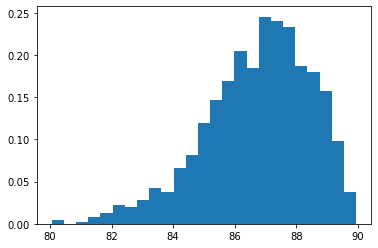

In [12]:
dec, inc = ipmag.fishrot(dec=0, inc=90, k=500, n=1000, di_block = False)
# inc = np.array(inc)/180*np.pi
plt.hist(inc, density = True, bins = 25)
plt.show()

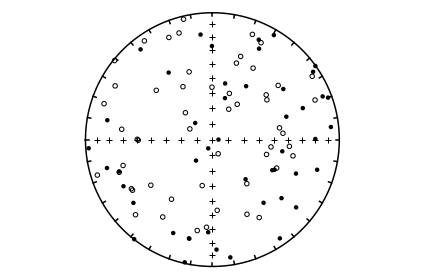

In [12]:
ipmag.plot_net()
ipmag.plot_di(di_block=directions_k0)

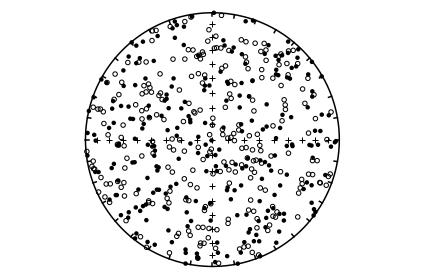

In [13]:
directions_k0 = ipmag.fishrot(dec=0, inc=90, k=0.00001, n=500)
ipmag.plot_net()
ipmag.plot_di(di_block=directions_k0)

### Generating vectors from a Fisher distribution with a higher kappa

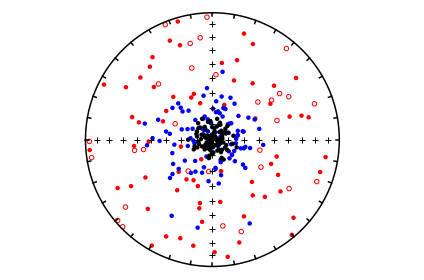

In [14]:
directions_k1 = ipmag.fishrot(dec=0, inc=90, k=1, n=100)
directions_k10 = ipmag.fishrot(dec=0, inc=90, k=10, n=100)
directions_k100 = ipmag.fishrot(dec=0, inc=90, k=100, n=100)
ipmag.plot_net()
ipmag.plot_di(di_block=directions_k1, color = 'red')
ipmag.plot_di(di_block=directions_k10, color = 'blue')
ipmag.plot_di(di_block=directions_k100)



## Visualizing the vectors on a globe

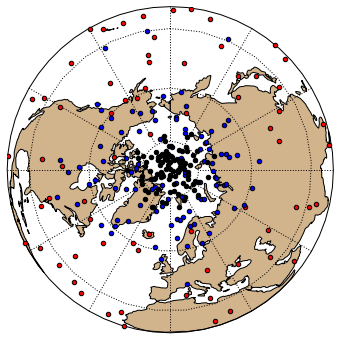

In [15]:
map_axis = ipmag.make_orthographic_map(central_latitude=90, figsize=(6, 6))
ipmag.plot_vgp(map_axis, di_block=directions_k1, markersize=20, color = 'red')
ipmag.plot_vgp(map_axis, di_block=directions_k10, markersize=20, color = 'blue')
ipmag.plot_vgp(map_axis, di_block=directions_k100, markersize=20)

## Let's simulate a lot of directions

Let's draw a bunch of directions from a Fisher distribution:

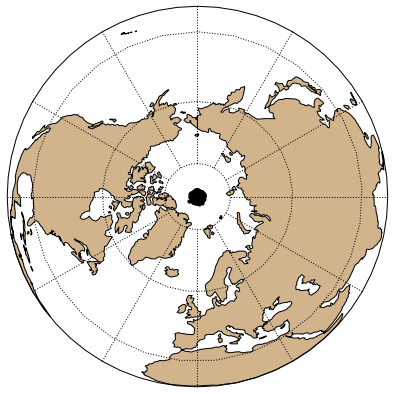

In [16]:
number_directions = 10000
directions = ipmag.fishrot(k=10000, n=number_directions)
map_axis = ipmag.make_orthographic_map(central_latitude=90,figsize=(7,7))
ipmag.plot_vgp(map_axis,di_block=directions,markersize=10)

From this large population of latitude/longitude vectors, let's visualize the distribution of longitudes and of latitudes:

In [17]:
lon, lat, mag = ipmag.unpack_di_block(directions)
lon_bins = 36

def plot_distributions():
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    axs[0].hist(lon, bins=lon_bins)
    axs[0].set_xlim(0,360)
    axs[0].set_xlabel('longitude')
    axs[1].hist(lat, bins=lon_bins)
    axs[1].set_xlim(90,0)
    axs[1].set_xlabel('latitude')
    return axs

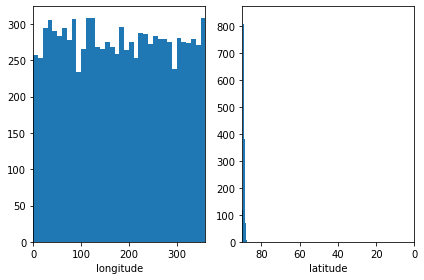

In [18]:
plot_distributions()
plt.show()

The distribution of longitudes is uniform.
The distribution of latitudes is exponentially distributed away from the pole following the normalization factor associated with the distribution. 

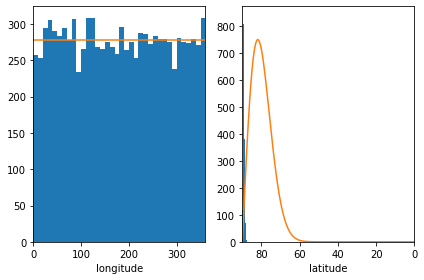

In [19]:
axs = plot_distributions()
axs[0].hlines(number_directions/lon_bins,0,360,color='#ff7f0e')
k = 50
x = np.linspace(0, 90, 180)
y = (k/(2*np.pi*np.sinh(k)))*np.exp(k*np.cos(np.deg2rad(x)))*np.sin(np.deg2rad(x))*550
axs[1].plot(np.flipud(x),y)
plt.show()

### Calculating and plotting angles from mean for different k values

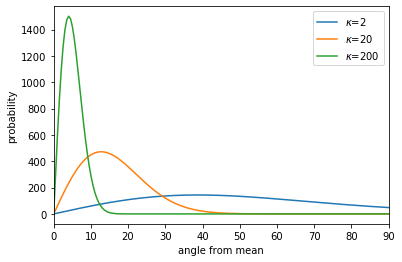

In [20]:
def lat_distribution(k=20):    
    x = np.linspace(0, 90, 180)
    y = (k/(2*np.pi*np.sinh(k)))*np.exp(k*np.cos(np.deg2rad(x)))*np.sin(np.deg2rad(x))*550
    return x, y

x_2, y_2 = lat_distribution(k=2)
x_20, y_20 = lat_distribution(k=20)
x_200, y_200 = lat_distribution(k=200)
plt.plot(x_2,y_2,label='$\kappa$=2')
plt.plot(x_20,y_20,label='$\kappa$=20')
plt.plot(x_200,y_200,label='$\kappa$=200')
plt.legend()
plt.xlabel('angle from mean')
plt.ylabel('probability')
plt.xlim(0,90)
plt.show()

### Shape of the distribution

When considered by angular area the distribution looks more like one might expect associated with a normal distribution then the peak the distribution as a function of angle alone:

![](images/Fisher_distribution.png)
*From Butler, 1992*

### Estimating the concentration parameter $\kappa$

From a finite sample
set of directions, $\kappa$ is unknown, but a best estimate of $\kappa$  can be calculated by

\begin{equation}
\kappa \simeq k
={{N-1}\over {N-R}},
\label{eq:k}
\end{equation}

where $N$ is the number of data points. This graphic provides intuitive insight into this relationship — as k increases, R approaches N for a tightly clustered set of directions.

![](images/R_approaches_N.png)

### Determining the confidence on the mean

Using this estimate of $\kappa$, the confidence about the mean, $\alpha$, can be estimated by:

\begin{equation}
\alpha_{1-p}=\hbox {cos}^{-1}\bigl[1 - {{N-R}\over {R}}\bigl[
\bigl({1\over {p}}\bigr)^{1\over
{(N-1)}}-1\bigr]\bigr].
\end{equation}

This confidence is typically reported as the circle of 95\% confidence $\alpha_{95}$

\begin{equation}
\alpha_{95}=\hbox {cos}^{-1}\bigl[1 - {{N-R}\over {R}}\bigl[
\bigl({20}\bigr)^{1\over
{(N-1)}}-1\bigr]\bigr].
\label{eq:a95}
\end{equation}
$\alpha_{95}$ is analogous to two estimated standard errors of the mean. While $\kappa$ is independent of N, $\alpha_{95}$ is dependent on N.

### Calculating the $\alpha_{95}$ confidence

Plon: 42.5  Plat: 88.5
Number of directions in mean (n): 100
Angular radius of 95% confidence (A_95): 1.9
Precision parameter (k) estimate: 57.7


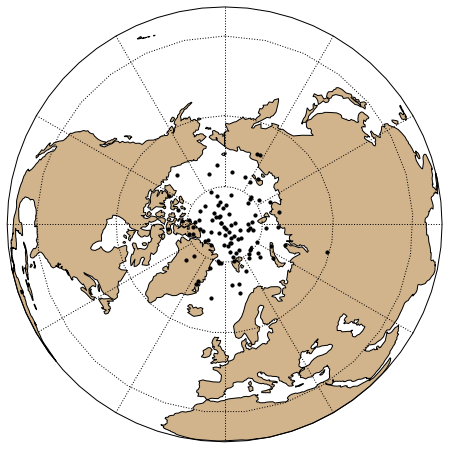

In [21]:
number_directions = 100
directions = ipmag.fishrot(k=50, n=number_directions)
map_axis = ipmag.make_orthographic_map(central_latitude=90)
ipmag.plot_vgp(map_axis,di_block=directions,markersize=10)

mean_direction = ipmag.fisher_mean(di_block=directions)
ipmag.print_pole_mean(mean_direction)

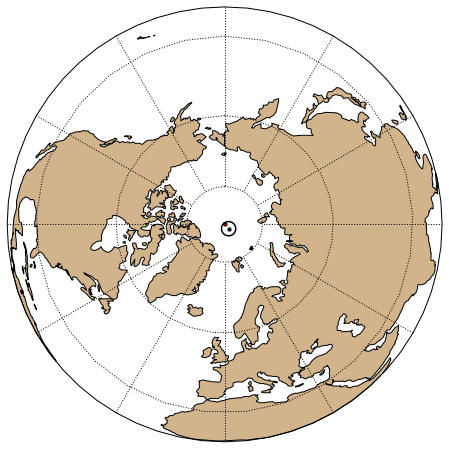

In [22]:
map_axis = ipmag.make_orthographic_map(central_latitude=90)
ipmag.plot_vgp(map_axis,0,90,color='r',markersize=10)
ipmag.plot_pole(map_axis,mean_direction['dec'],mean_direction['inc'],mean_direction['alpha95'],markersize=10)

## Test of the common mean

The Fisher distribution is quite useful for succinctly summarizing directional data and for conducting statistical tests such as tests for a common mean. There is a rich suite of statistical tests that hinge on assuming a Fisher distribution. Such as:
![](images/Watson1983.png)

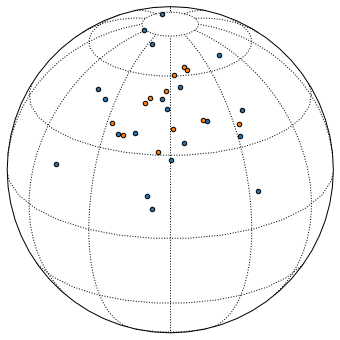

In [23]:
directions_1 = ipmag.fishrot(k=10, n=20, dec=0,inc=45)
directions_2 = ipmag.fishrot(k=30, n=12, dec=0,inc=45)
map_axis = ipmag.make_orthographic_map(central_latitude=25, figsize=(6, 6),add_land=False)
ipmag.plot_vgp(map_axis,di_block=directions_1,markersize=20,color='#1f77b4')
ipmag.plot_vgp(map_axis,di_block=directions_2,markersize=20,color='#ff7f0e')

In [24]:
print(directions_1)

[[17.33381131355577, 41.68767321992515, 1.0], [353.30621338661444, 10.953412439790505, 1.0], [46.30017078633159, 65.63323562141223, 1.0], [36.60395887278844, 42.62419830950278, 1.0], [351.3216725075236, 15.623199136733344, 1.0], [33.688840208253964, 13.473080169219381, 1.0], [30.84620334036424, 34.104446526212996, 1.0], [335.5048988884514, 74.53747933765169, 1.0], [316.71321246492926, 49.920348275815414, 1.0], [198.94342061569319, 81.49799597968678, 1.0], [344.31318424935387, 37.41512671855798, 1.0], [5.965055983608977, 34.416686977595624, 1.0], [323.74290963001863, 47.11799975594926, 1.0], [358.16465712786237, 46.703909922650816, 1.0], [6.2367297023996, 55.47829149127808, 1.0], [355.5711599582214, 50.543569438428264, 1.0], [297.8416132072631, 79.35786013728482, 1.0], [0.1725557213028992, 28.320491109084948, 1.0], [311.83184129042576, 19.348067381899423, 1.0], [336.623587623361, 35.95641902450463, 1.0]]


In [25]:
directions_1

[[17.33381131355577, 41.68767321992515, 1.0],
 [353.30621338661444, 10.953412439790505, 1.0],
 [46.30017078633159, 65.63323562141223, 1.0],
 [36.60395887278844, 42.62419830950278, 1.0],
 [351.3216725075236, 15.623199136733344, 1.0],
 [33.688840208253964, 13.473080169219381, 1.0],
 [30.84620334036424, 34.104446526212996, 1.0],
 [335.5048988884514, 74.53747933765169, 1.0],
 [316.71321246492926, 49.920348275815414, 1.0],
 [198.94342061569319, 81.49799597968678, 1.0],
 [344.31318424935387, 37.41512671855798, 1.0],
 [5.965055983608977, 34.416686977595624, 1.0],
 [323.74290963001863, 47.11799975594926, 1.0],
 [358.16465712786237, 46.703909922650816, 1.0],
 [6.2367297023996, 55.47829149127808, 1.0],
 [355.5711599582214, 50.543569438428264, 1.0],
 [297.8416132072631, 79.35786013728482, 1.0],
 [0.1725557213028992, 28.320491109084948, 1.0],
 [311.83184129042576, 19.348067381899423, 1.0],
 [336.623587623361, 35.95641902450463, 1.0]]

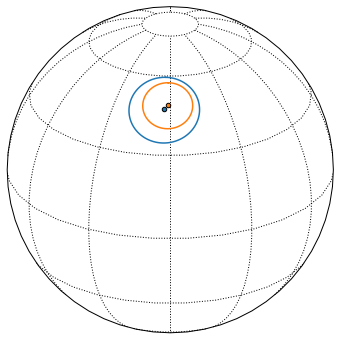

In [26]:
mean_1 = ipmag.fisher_mean(di_block=directions_1)
mean_2 = ipmag.fisher_mean(di_block=directions_2)

map_axis = ipmag.make_orthographic_map(central_latitude=25, figsize=(6, 6),add_land=False)
ipmag.plot_pole(map_axis,mean_1['dec'],mean_1['inc'],mean_1['alpha95'],markersize=20,color='#1f77b4')
ipmag.plot_pole(map_axis,mean_2['dec'],mean_2['inc'],mean_2['alpha95'],markersize=20,color='#ff7f0e')

In [27]:
ipmag.common_mean_watson(directions_1,directions_2)

Results of Watson V test: 

Watson's V:           0.1
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.9
Critical angle for M&M1990:   14.7
The McFadden and McElhinny (1990) classification for
this test is: 'C'


(1, 1.8780285601214088, 14.712725173093038)

## Are the data Fisher distributed?

Likely because of these frameworks, Fisher stats are often applied to data sets that don't follow a Fisher distribution. A test of whether data are consistent with a Fisher distribution is valuable (such as a quantile-quantile comparison). These data sampled from a Fisher distribution should look pretty good:

{'Mode': 'Mode 1',
 'Dec': 358.47589947511693,
 'Inc': 48.47713187762145,
 'N': 12,
 'Mu': -0.7539985310487487,
 'Mu_critical': 1.207,
 'Me': 0.7191076359367202,
 'Me_critical': 1.094,
 'Test_result': 'consistent with Fisherian model'}

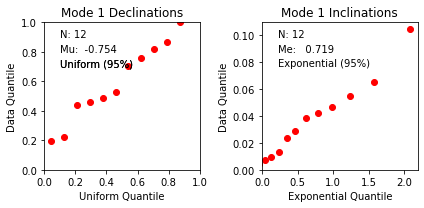

In [28]:
ipmag.fishqq(di_block=directions_2)

## Non-parameteric statistical tests

Many of the same tests that are implemented assuming Fisher statistics can be implemented in a non-parametric way. Such as the bootstrap test for a common mean developed by Lisa Tauxe:

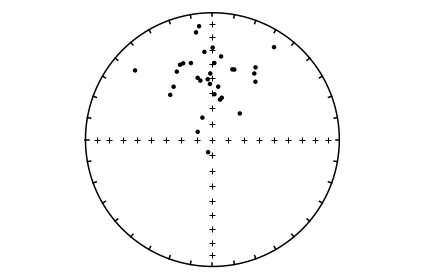

In [36]:
ipmag.plot_net()
ipmag.plot_di(di_block = directions_1)
ipmag.plot_di(di_block = directions_2)

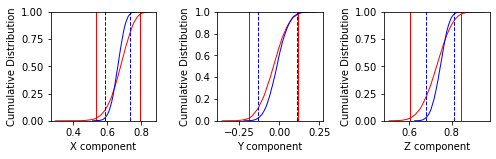

In [29]:
ipmag.common_mean_bootstrap(directions_1,directions_2)

## Other distributions
- Kent distribution (or 5-parameter Fisher–Bingham distribution)

Many data sets  have a  more elliptical distribution than the symmetrical distribution required for a Fisherian data set.   A distribution that allows data with elliptical directional dispersion would likely be better. The elliptical analogue of the Fisher distribution is the Kent distribution (Kent, 1982) given by:
    
\begin{equation}
   F = c(\kappa,\beta)^{-1} \exp(\kappa \cos \alpha + \beta \sin^2 \alpha \cos 2\phi),
\label{eq:kent}
\end{equation}

The uniform distribution about the mean as in the Fisher distribution no longer holds. If we calculate eigenparameters for the orientation matrix of the data , then the major and minor eigenvectors ($V_2, V_3$) lie in  a plane orthogonal to the mean direction along the axis with the most and least scatter respectively. 

In [30]:
!eqarea_ell.py -sav -f ./data/example_data.dat -fmt png -ell K

mode  1
     dec   357.6
     inc    27.8
     n        30
     Zdec    95.3
     Zinc    14.3
     Edec   209.6
     Einc    58.1
     Zeta     7.0
     Eta     3.9
1  saved in  .-data-example_data.dat_eq.png


![](./images/example_data.png)

## Spherical probability distributions

![](images/distributions.png)

*Figure by Ian Rose*

### Uniform distribution

The simplest probability distribution on a sphere is the spherical uniform distribution.
It has a probability density given by
\begin{equation}
  \rho_U(\phi, \psi) = \frac{1}{4 \pi},
\end{equation}
where $\rho_U$ is the probability density, $\phi$ is the longitude, and $\psi$ is the latitude.
Most non-uniform distributions on a sphere reduce to the uniform distribution in some limit.

### Watson girdle distribution
The Fisher distribution concentrates probability density around a pole, the Watson girdle probability distribution is concentrated in a belt orthogonal to a pole - useful for characterizing planar data.
\begin{equation}
  \begin{aligned}
  \rho_W(\phi, \psi; \kappa_W, \hat{\mu}) 
  &= \frac{1}{C_W} \exp \left( \kappa_W (\hat{x}^T \hat{\mu})^2 \right) \\
  &= \frac{1}{C_W} \exp \left( \kappa_W \cos^2 \theta \right),
  \end{aligned}
\label{eq:watson}
\end{equation}
where $\kappa_W$ is the concentration of the girdle, $C_W$ is a normalization coefficient,
and the other parameters are identical to those in the Fisher distribution.

The Watson distribution is girdle-shaped only when $\kappa_W$ is a negative number, 
which is the only case we consider here.
The normalization factor is given by
\begin{equation}
  C_W = \left[ {}_1 F_1 \left( \frac{1}{2}, \frac{3}{2}, \kappa_W \right) \right]^{-1},
\end{equation}
where ${}_1 F_1()$ is Kummer's confluent hypergeometric function, which is available
in most software libraries of special mathematical functions.
As with the Fisher distribution, when $\kappa_W$ goes to zero, 
the Watson distribution is equivalent to the spherical uniform distribution.

This Jupyter notebook slideshow can be converted to an html slideshow using this command:
    
```
jupyter nbconvert Fisher_Distribution.ipynb  --to slides --reveal-prefix "https://cdn.jsdelivr.net/npm/reveal.js@3.6.0 "
```